# Set Up

In [157]:
version

               _                           
platform       aarch64-apple-darwin20      
arch           aarch64                     
os             darwin20                    
system         aarch64, darwin20           
status                                     
major          4                           
minor          2.0                         
year           2022                        
month          04                          
day            22                          
svn rev        82229                       
language       R                           
version.string R version 4.2.0 (2022-04-22)
nickname       Vigorous Calisthenics       

## Import Libraries

In [35]:
library(tidyverse)
library(data.table)
library(broom)
library(dtplyr)
library(lme4) #for lmer & glmer models
library(lmerTest)
library(psych)
library(corrplot)
library(sjPlot) #for plotting lmer and glmer mods
library(ggpubr)
library(cowplot)

── Attaching packages ────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step



Attaching package: ‘psych’


The following objects are masked from ‘p

## Import Data

In [5]:
load('../../3_1_2_processed_data/VIB_measure_cleaned_data2022-05-19.RData')

In [368]:
# SONA 1-3, Retest
clean_sona123 = qn_df[qn_df$version!='ib_retest',]
valid_sona123 = validation_measures[qn_df$version!='ib_retest',]
domains_sona123 = ib_gap_domains[qn_df$version!='ib_retest',]

# SONA Retest
clean_sonaR = qn_df[qn_df$version=='ib_retest',]
valid_sonaR = validation_measures[qn_df$version=='ib_retest',]
domains_sonaR = ib_gap_domains[qn_df$version=='ib_retest',]

# SONA 4 (includes interactions)
clean_sona4 = read.csv('../../3_1_2_processed_data/clean_sona4.csv')
interact_sona4 = read.csv('../../3_1_2_processed_data/interact_sona4.csv')

# Prolific (includes interactions)
# Data cleaning involved standard attention check, second attention check in the interaction questions, and minimum 45 minutes to complete
# 51 subjects -> 22
clean_pro = read.csv('../../3_1_2_processed_data/clean_pro.csv')
valid_pro = read.csv('../../3_1_2_processed_data/valid_pro.csv')
interact_pro = read.csv('../../3_1_2_processed_data/interact_pro.csv')

In [371]:
clean_sona123 = select(clean_sona123, -c('self_esteem_single_1', 'swl_cantril_ladder'))
valid_sona123 = valid_sona123 %>% select(-subjectID)

domains_sona123 = domains_sona123 %>% select(-ib_domain_gap_subjectID)
demo_sona123 = demographics[qn_df$version!='ib_retest',]

clean_sona123 = cbind(clean_sona123, domains_sona123)
clean_sona123 = cbind(clean_sona123, valid_sona123)
clean_sona123$bmi = demo_sona123$bmi

In [403]:
clean_pro = select(clean_pro, -c('self_esteem_single_1', 'swl_cantril_ladder'))
valid_pro = valid_pro %>% select(-subjectID)

clean_pro = cbind(clean_pro, valid_pro)

In [375]:
gap = clean_sona123 %>%
    as_tibble() %>%
    select(contains('domain_gap_')) %>%
    sapply(as.numeric) %>%
    as_tibble() %>%
    rowMeans(na.rm=T)
clean_sona123$ib_gap = gap

success = clean_sonaR %>%
    as_tibble() %>%
    select(contains('domain_success')) %>%
    sapply(as.numeric) %>%
    as_tibble() %>%
    rowMeans(na.rm=T)
gap = 100 - success
clean_sonaR$ib_gap = gap

In [381]:
clean_sona123$gap = as.numeric(clean_sona123$ib_gap)

In [376]:
clean_sona123$meta_gap_feelings = as.numeric(clean_sona123$meta_gap_feelings_1)
clean_sona4$meta_gap_feelings = as.numeric(clean_sona4$meta_gap_feelings_1)
clean_pro$meta_gap_feelings = as.numeric(clean_pro$meta_gap_feelings_1)

# Overview

## Demographics

### Sona 1-3

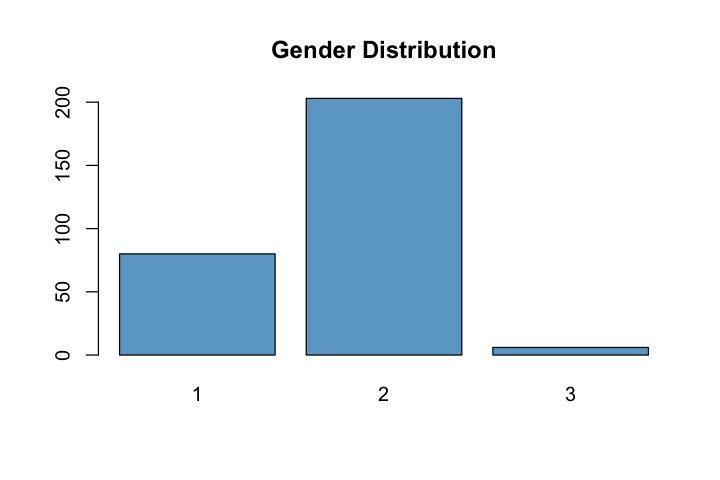

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   18.00   18.00   18.76   19.00   47.00 


  1   2   3 
 80 203   6 

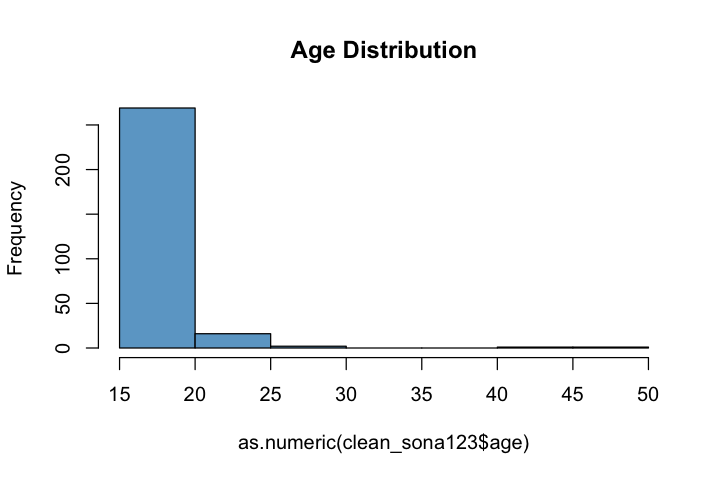

In [91]:
options(repr.plot.width = 6, repr.plot.height = 4)

counts <- table(clean_sona123$gender)
barplot(counts, main="Gender Distribution", col = 'skyblue3')
hist(as.numeric(clean_sona123$age), main="Age Distribution", col = 'skyblue3')
summary(as.numeric(clean_sona123$age))
table(clean_sona123$gender)

### Sona 4

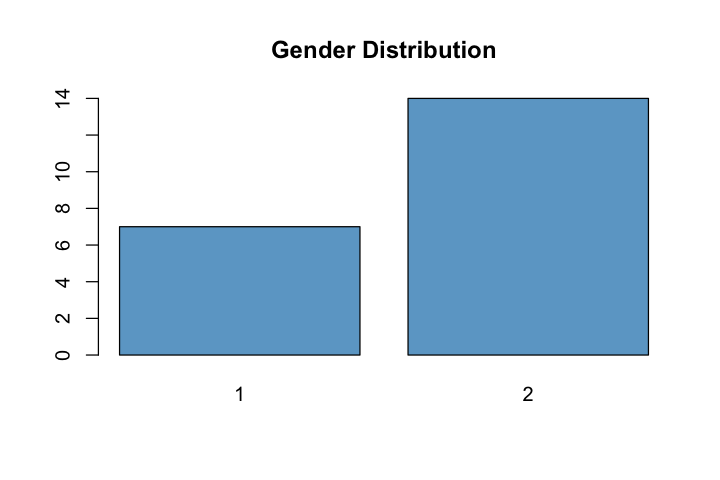

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   19.00   19.00   19.81   21.00   23.00 


 1  2 
 7 14 

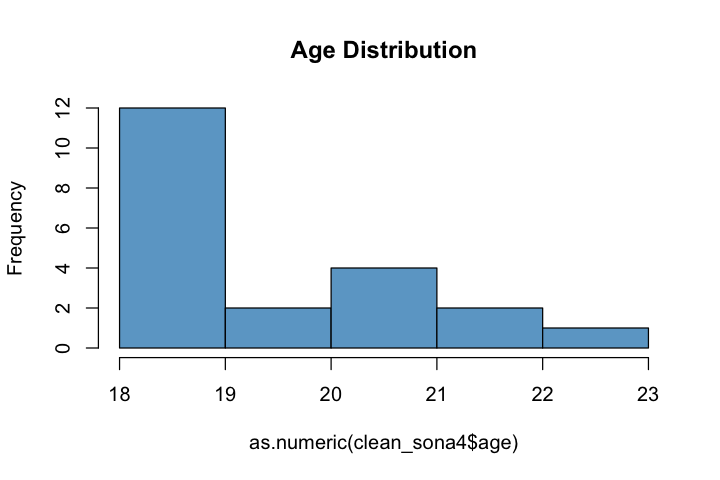

In [92]:
counts <- table(clean_sona4$gender)
barplot(counts, main="Gender Distribution", col = 'skyblue3')
hist(as.numeric(clean_sona4$age), main="Age Distribution", col = 'skyblue3')
summary(as.numeric(clean_sona4$age))
table(clean_sona4$gender)

### Prolific

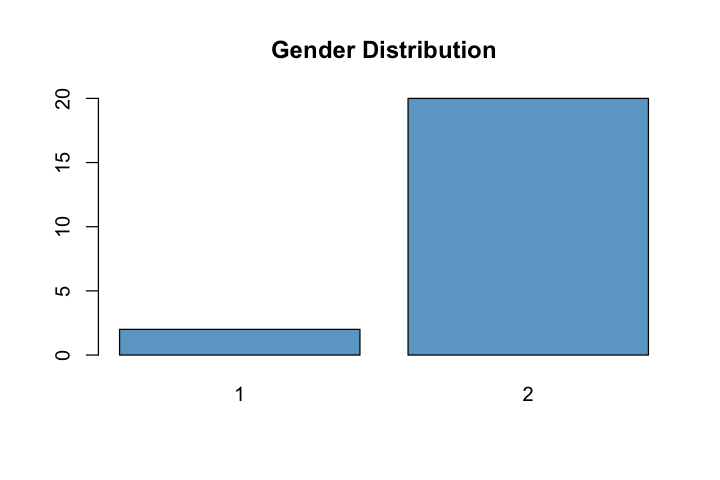

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.00   28.75   37.00   37.59   42.75   58.00 


 1  2 
 2 20 

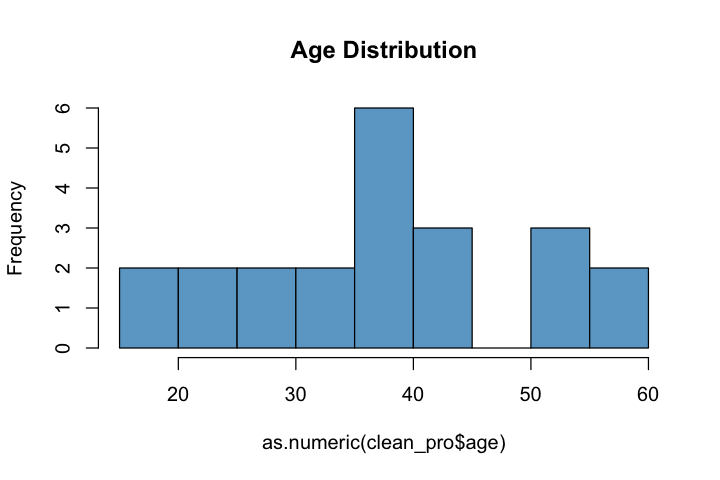

In [93]:
counts <- table(clean_pro$gender)
barplot(counts, main="Gender Distribution", col = 'skyblue3')
hist(as.numeric(clean_pro$age), main="Age Distribution", col = 'skyblue3')
summary(as.numeric(clean_pro$age))
table(clean_pro$gender)

# Analysis

## Validations

### Face Validity

#### Gap Magnitude x Feeling

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



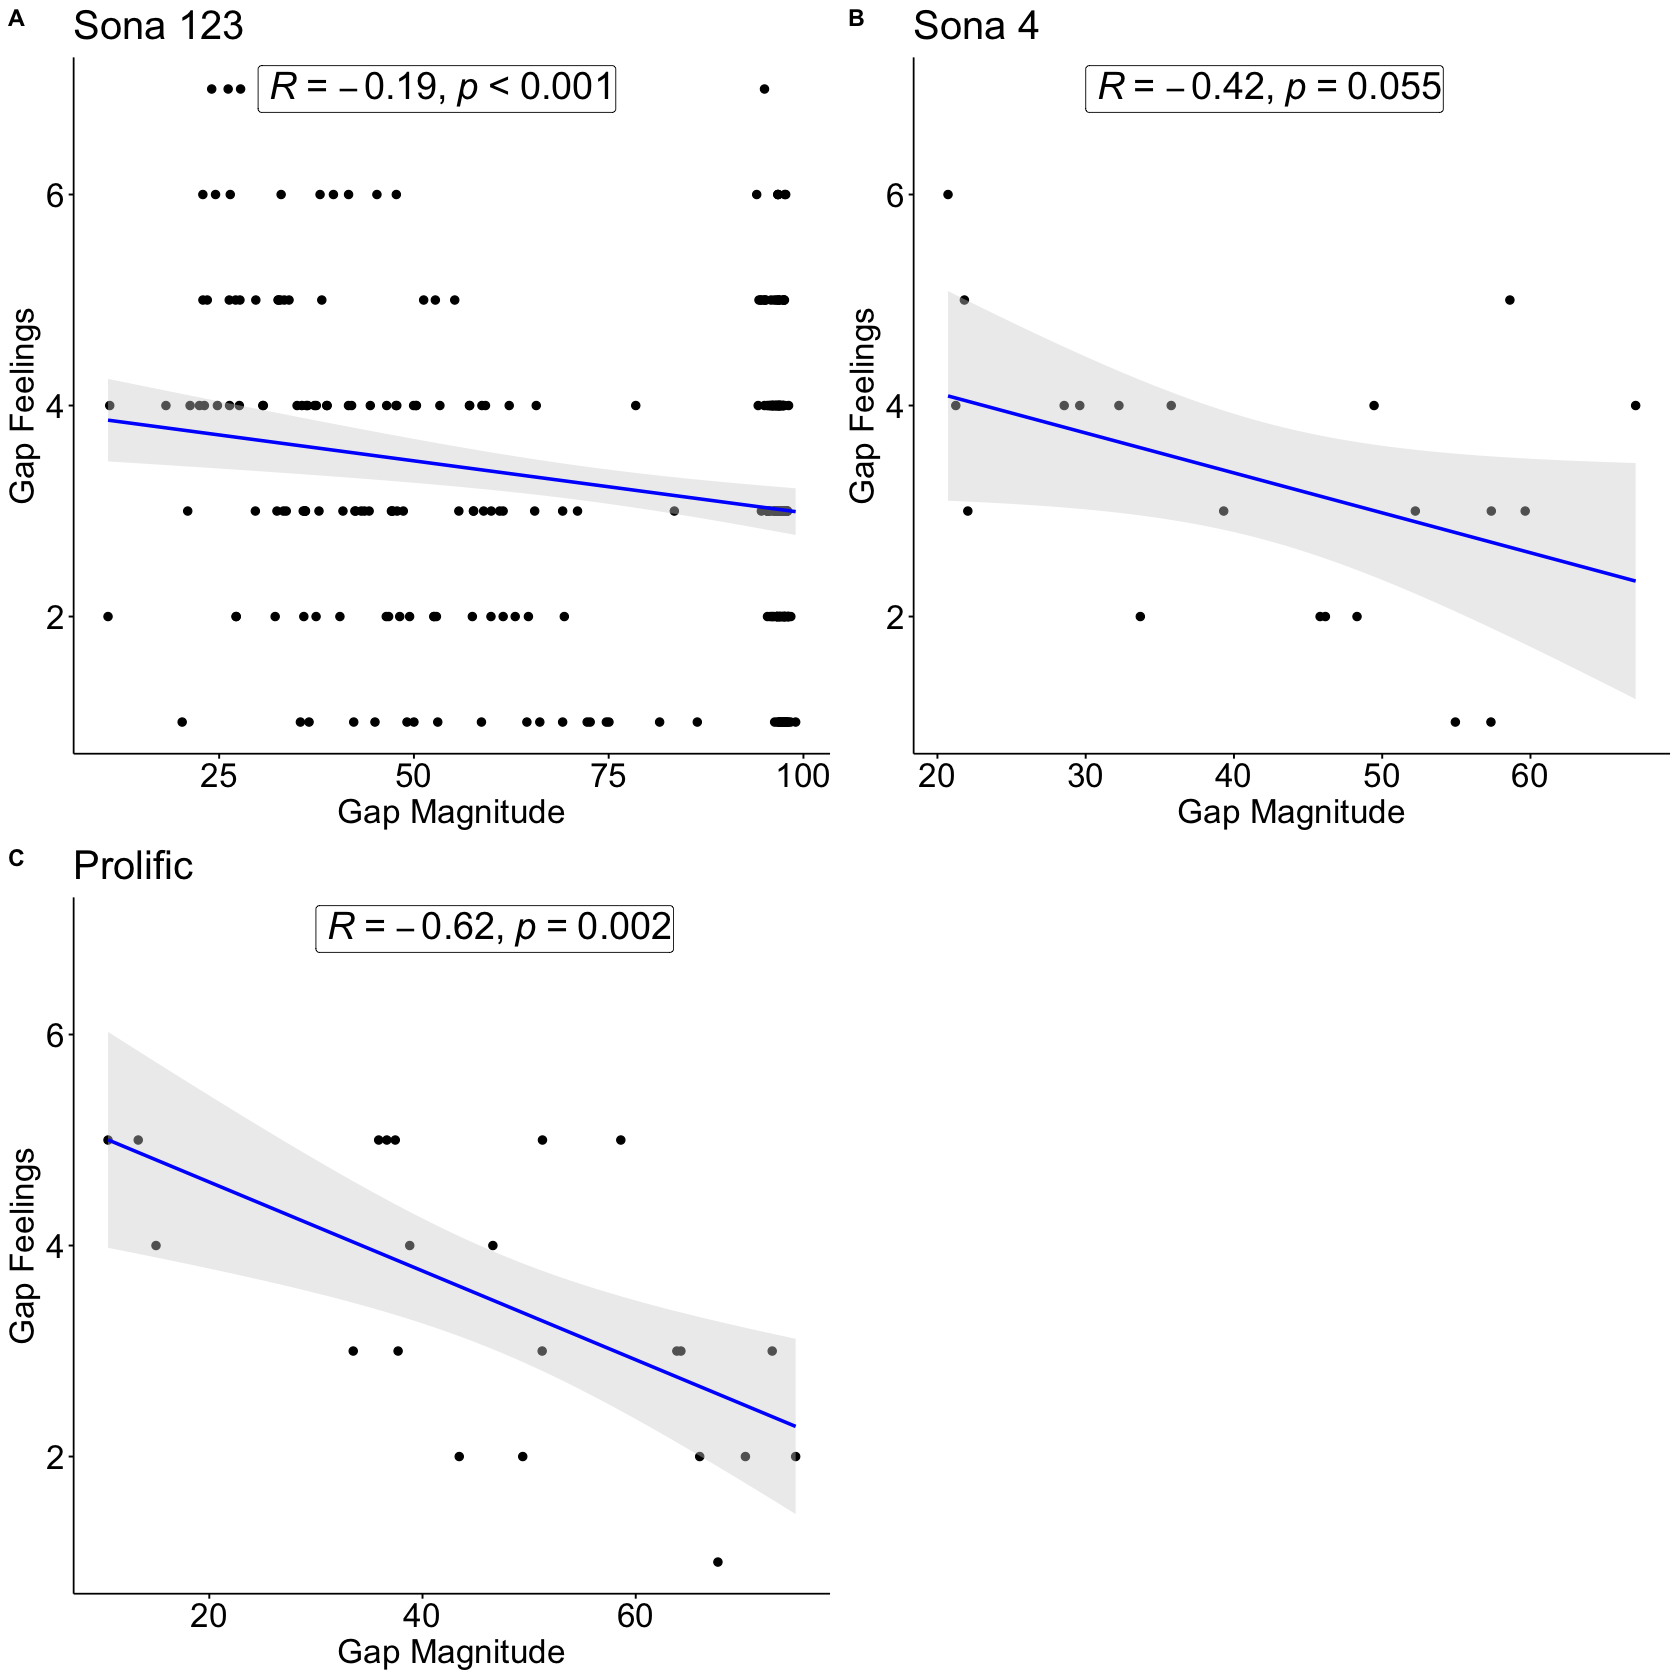

In [90]:
options(repr.plot.width = 14, repr.plot.height = 14)

sona <- ggscatter(clean_sona123, x = "ib_gap", y = 'meta_gap_feelings',
    add = "reg.line",  # Add regressin line
    add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
    conf.int = TRUE # Add confidence interval
    ) + # Add correlation coefficient
    stat_cor(p.accuracy = 0.001, r.accuracy = 0.01, label.y = 7, label.x = 30, size=8, geom = "label") + 
    theme(text = element_text(size = 20)) +
    labs(x = 'Gap Magnitude', y = 'Gap Feelings', title = "Sona 123")

sona4 <- ggscatter(clean_sona4, x = "ib_gap", y = 'meta_gap_feelings',
    add = "reg.line",  # Add regressin line
    add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
    conf.int = TRUE # Add confidence interval
    ) + # Add correlation coefficient
    stat_cor(p.accuracy = 0.001, r.accuracy = 0.01, label.y = 7, label.x = 30, size=8, geom = "label") + 
    theme(text = element_text(size = 20)) +
    labs(x = 'Gap Magnitude', y = 'Gap Feelings', title = "Sona 4")

prolific <- ggscatter(clean_pro, x = "ib_gap", y = 'meta_gap_feelings',
    add = "reg.line",  # Add regressin line
    add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
    conf.int = TRUE # Add confidence interval
    ) + # Add correlation coefficient
    stat_cor(p.accuracy = 0.001, r.accuracy = 0.01, label.y = 7, label.x = 30, size=8, geom = "label") + 
    theme(text = element_text(size = 20)) +
    labs(x = 'Gap Magnitude', y = 'Gap Feelings', title = "Prolific")

plot_grid(sona, sona4, prolific, labels = "AUTO")

#### Gap x Age

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



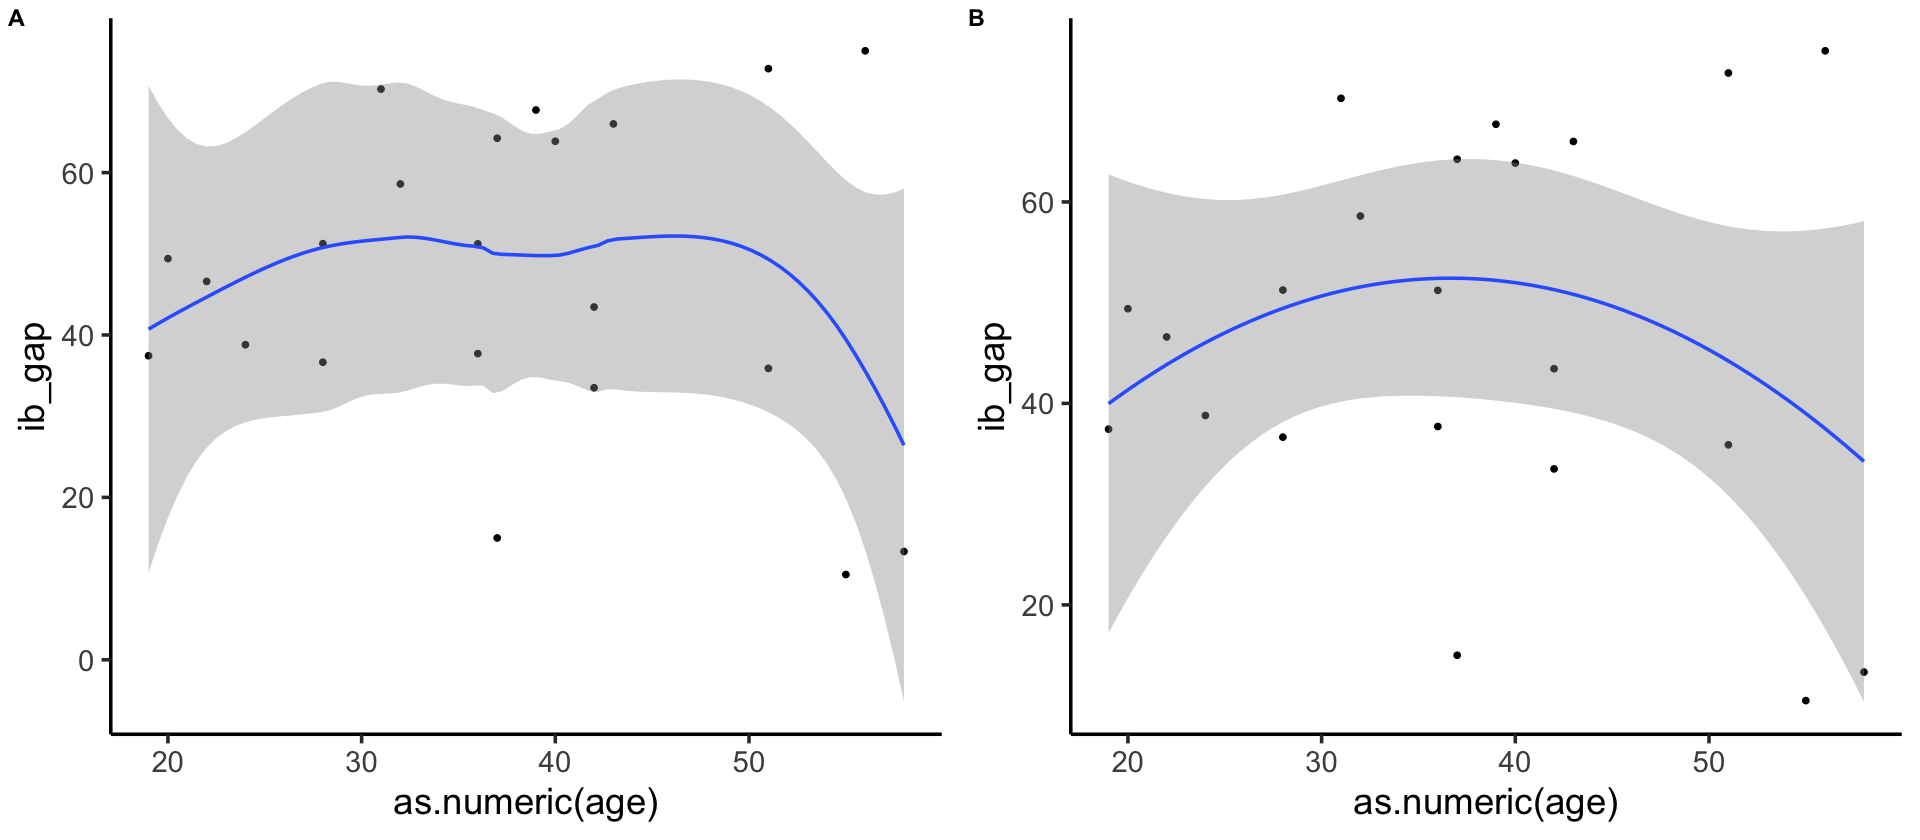

In [147]:
options(repr.plot.width = 16, repr.plot.height = 7)

a = ggplot(clean_pro, aes(as.numeric(age), ib_gap)) +
  geom_point() +
  geom_smooth() + 
    theme_classic(base_size = 22)

b = ggplot(clean_pro, aes(as.numeric(age), ib_gap)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x + I(x^2), size = 1) + 
    theme_classic(base_size = 22)

plot_grid(a, b, labels = "AUTO")

In [166]:
linearModel <- lm(ib_gap ~ as.numeric(age), data=clean_pro)
summary(linearModel)

#create a new variable for hours2
clean_pro$age2 <- as.numeric(clean_pro$age)^2

quadraticModel <- lm(ib_gap ~ as.numeric(age) + age2, data=clean_pro)
summary(quadraticModel)

# what about with 220 subjects
clean_pro10 = clean_pro[rep(seq_len(nrow(clean_pro)), 10), ]

quadraticModel <- lm(ib_gap ~ as.numeric(age) + age2, data=clean_pro10)
summary(quadraticModel)


Call:
lm(formula = ib_gap ~ as.numeric(age), data = clean_pro)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.270 -11.551  -1.589  16.949  30.371 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      52.5651    14.4004   3.650  0.00159 **
as.numeric(age)  -0.1417     0.3667  -0.386  0.70321   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.55 on 20 degrees of freedom
Multiple R-squared:  0.007413,	Adjusted R-squared:  -0.04222 
F-statistic: 0.1494 on 1 and 20 DF,  p-value: 0.7032



Call:
lm(formula = ib_gap ~ as.numeric(age) + age2, data = clean_pro)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.427 -11.672   0.311  11.856  37.512 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)
(Intercept)     -1.24704   43.28571  -0.029    0.977
as.numeric(age)  2.92857    2.36175   1.240    0.230
age2            -0.03994    0.03037  -1.315    0.204

Residual standard error: 19.2 on 19 degrees of freedom
Multiple R-squared:  0.09026,	Adjusted R-squared:  -0.005502 
F-statistic: 0.9425 on 2 and 19 DF,  p-value: 0.4071



Call:
lm(formula = ib_gap ~ as.numeric(age) + age2, data = clean_pro10)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.427 -12.787   0.311  11.872  37.512 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.247038  12.808301  -0.097    0.923    
as.numeric(age)  2.928569   0.698844   4.191 4.05e-05 ***
age2            -0.039944   0.008986  -4.445 1.40e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.96 on 217 degrees of freedom
Multiple R-squared:  0.09026,	Adjusted R-squared:  0.08188 
F-statistic: 10.76 on 2 and 217 DF,  p-value: 3.487e-05


#### Gap Accuracy

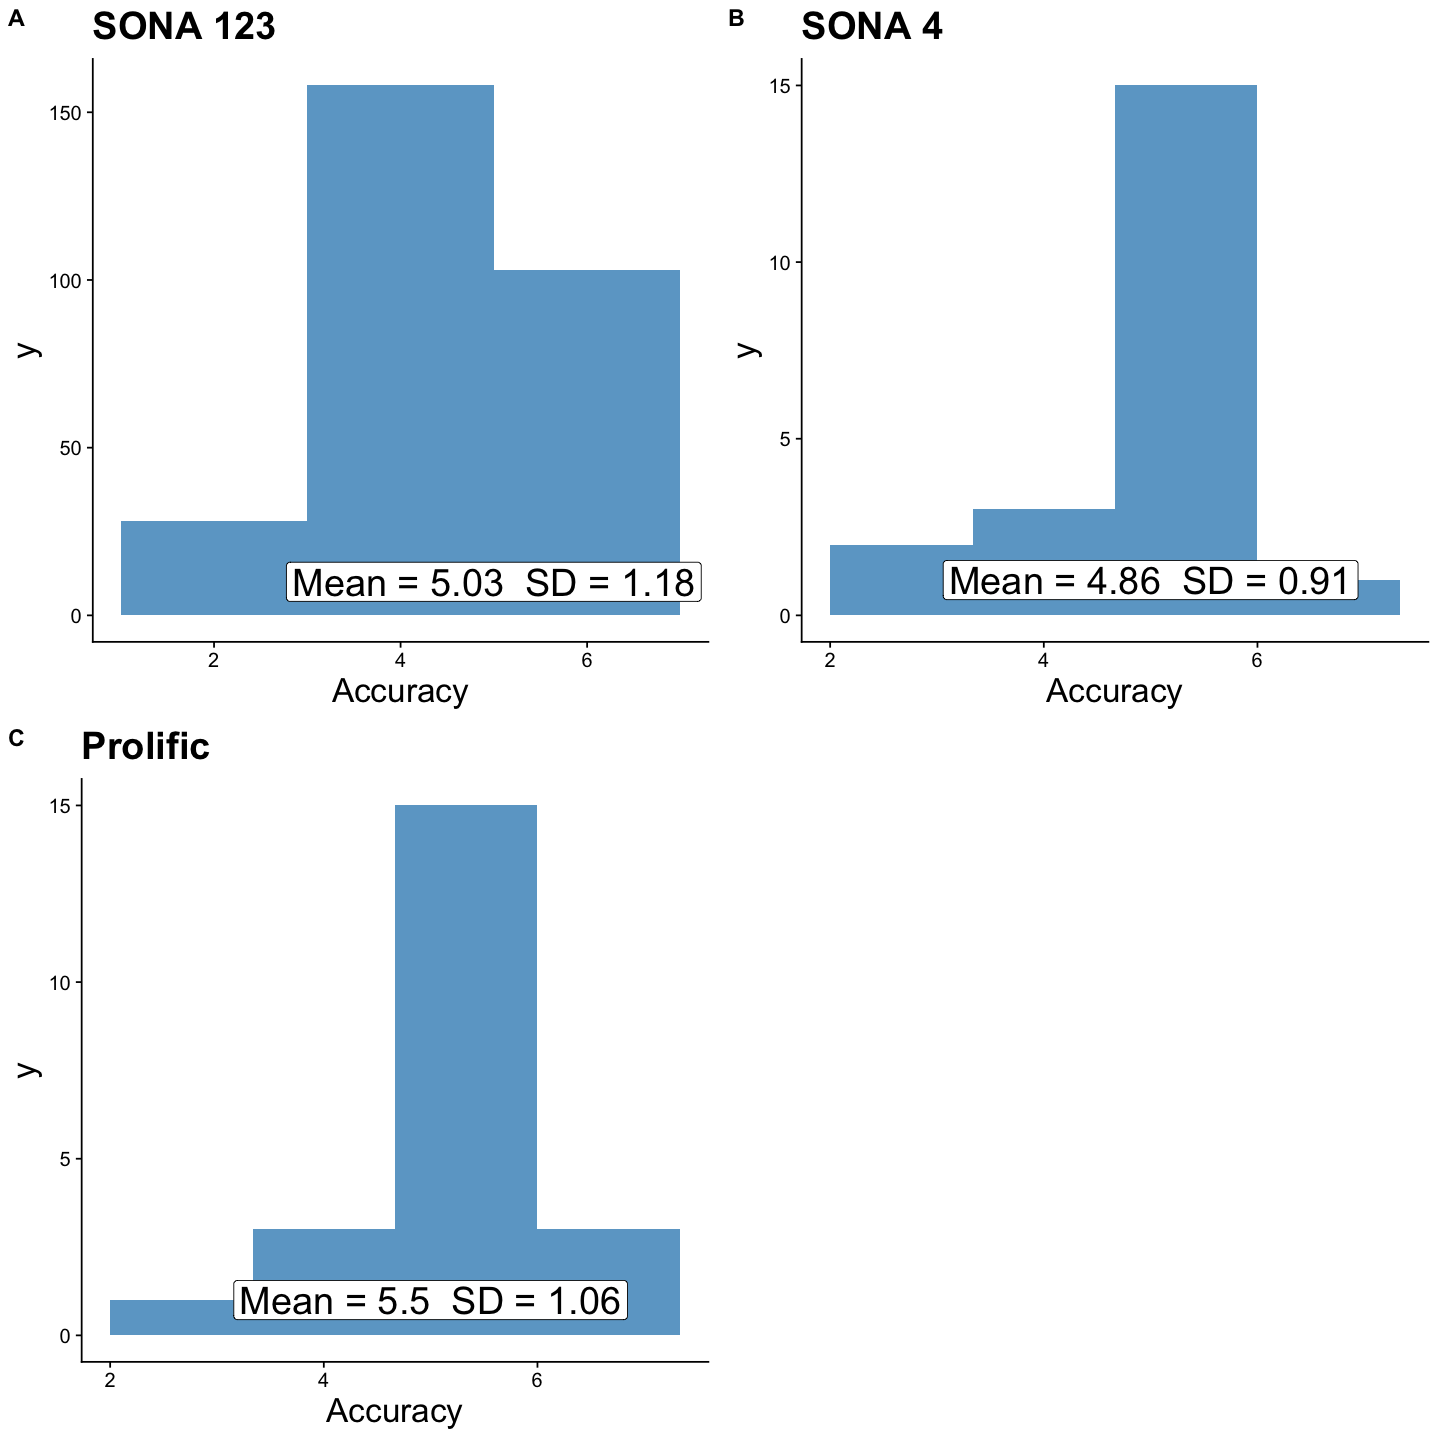

In [311]:
options(repr.plot.width = 12, repr.plot.height = 12)

a = ggplot(clean_sona123, aes(as.numeric(questions_accuracy_1))) + 
    geom_histogram(bins = 4, fill="skyblue3") +
    labs(title = "SONA 123", x = 'Accuracy') +
    annotate("label", x = 5, y = 10, label = paste("Mean =", round(mean(as.numeric(clean_sona123$questions_accuracy_1)),2), " SD =", round(sd(as.numeric(clean_sona123$questions_accuracy_1)),2)), size=8) +
    theme_cowplot() +
    theme(text = element_text(size=20))

b = ggplot(clean_sona4, aes(as.numeric(questions_accuracy_1))) + 
    geom_histogram(bins = 4, fill="skyblue3") +
    labs(title = "SONA 4", x = 'Accuracy') +
    annotate("label", x = 5, y = 1, label = paste("Mean =", round(mean(as.numeric(clean_sona4$questions_accuracy_1)),2), " SD =", round(sd(as.numeric(clean_sona4$questions_accuracy_1)),2)), size=8) +
    theme_cowplot() +
    theme(text = element_text(size=20))

c = ggplot(clean_pro, aes(as.numeric(questions_accuracy_1))) + 
    geom_histogram(bins = 4, fill="skyblue3") +
    labs(title = "Prolific", x = 'Accuracy') +
    annotate("label", x = 5, y = 1, label = paste("Mean =", mean(as.numeric(clean_pro$questions_accuracy_1)), " SD =", round(sd(as.numeric(clean_pro$questions_accuracy_1)),2)), size=8) +
    theme_cowplot() +
    theme(text = element_text(size=20))

plot_grid(a, b, c, labels = "AUTO")

### Convergent Validity

In [225]:
# add gap to df
valid_sona123$gap = clean_sona123$ib_gap
valid_pro$gap = clean_pro$ib_gap

#### Predictive OF Gap

In [377]:
predictors = c('ambition_score',
               'bscs_score',
               'con_hex_score',
               'grit_score',
               'needForCognition_score',
               'workEthic_score',
               'socialD_score',
               'parents_income',
               'macarthur_sss_parent',
               'macarthur_sss',
               'mother_education',
               'father_education'
              )

In [392]:
# make all numeric
clean_sona123[, c(predictors)] = lapply(clean_sona123[, c(predictors)], as.numeric) %>% as_tibble()

In [393]:
gap_preds_sona123 = as.data.frame(cor(clean_sona123[, c(predictors)], clean_sona123[, 'gap'], use="pairwise.complete.obs"))

In [401]:
gap_preds_sona123$r = round(gap_preds_sona123$V1, 2)
gap_preds_sona123$Significance = c('**','***','','***','**','***','', '**', '**', '', '', '')
gap_preds_sona123$Significance = as.factor(gap_preds_sona123$Significance)
gap_preds_sona123 = rownames_to_column(gap_preds_sona123, "Measure")
gap_preds_sona123$Measure = c('Ambition', 'Self Control', 'Conscientiousness', 'Grit', 'Need for Cog', 'Work Ethic', 'Social Desirability', 'Parent Income', 'SSS Parent', 'SSS Self', 'Mother Educ.', 'Father Educ.')

In [407]:
gap_preds_pro = as.data.frame(cor(clean_pro[, c(predictors)], clean_pro[, 'gap'], use="pairwise.complete.obs"))

In [409]:
gap_preds_pro$r = round(gap_preds_pro$V1, 2)
gap_preds_pro$Significance = c('','*','','','','','','','','','','')
gap_preds_pro$Significance = as.factor(gap_preds_pro$Significance)
gap_preds_pro = rownames_to_column(gap_preds_pro, "Measure")
gap_preds_pro$Measure = c('Ambition', 'Self Control', 'Conscientiousness', 'Grit', 'Need for Cog', 'Work Ethic', 'Social Desirability', 'Parent Income', 'SSS Parent', 'SSS Self', 'Mother Educ.', 'Father Educ.')

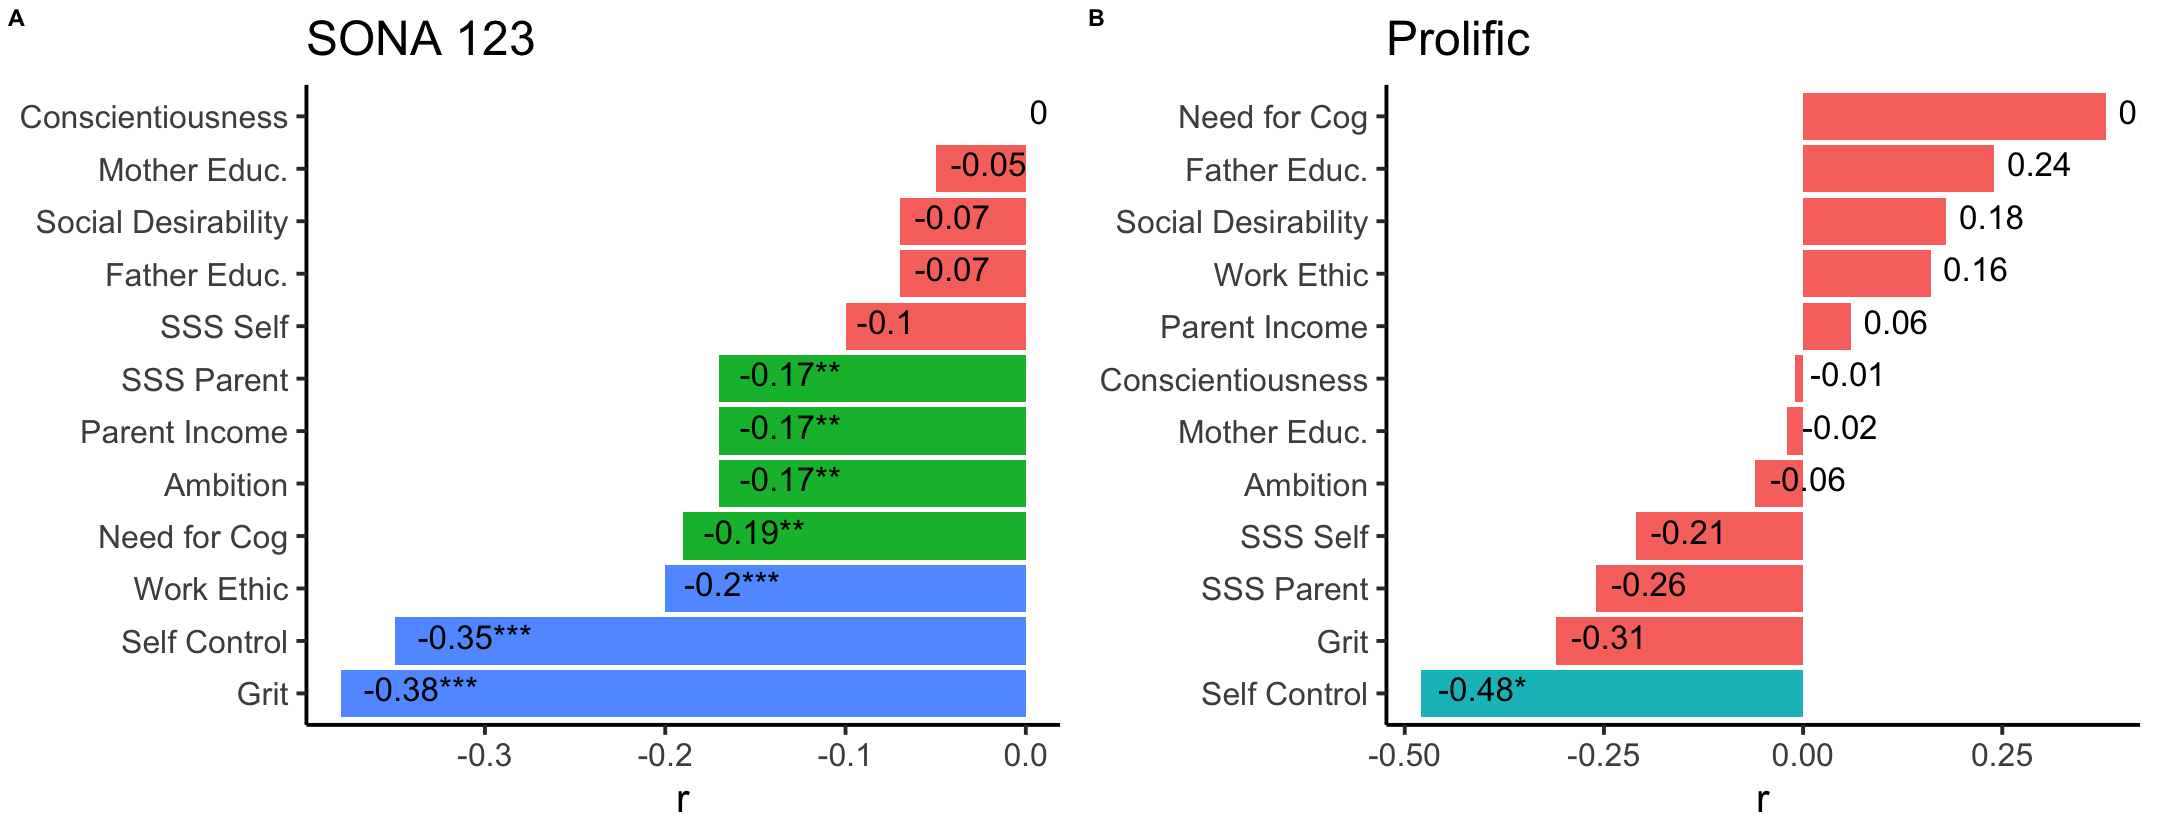

In [410]:
options(repr.plot.width = 18, repr.plot.height = 7)

a = ggplot(gap_preds_sona123, aes(x= reorder(Measure, r), y=r, fill = Significance)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=paste0(r, Significance)), vjust=.3, hjust = -0.2, size=7, color = 'black') +
    labs(title = "SONA 123") +
    coord_flip() +
    theme_classic(base_size = 24) +
    theme(legend.position = "none",
          axis.title.y = element_blank())

b = ggplot(gap_preds_pro, aes(x= reorder(Measure, r), y=r, fill = Significance)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=paste0(r, Significance)), vjust=.3, hjust = -0.2, size=7, color = 'black') +
    labs(title = "Prolific") +
    coord_flip() +
    theme_classic(base_size = 24) +
    theme(legend.position = "none",
          axis.title.y = element_blank())

plot_grid(a, b, labels = "AUTO")

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphic

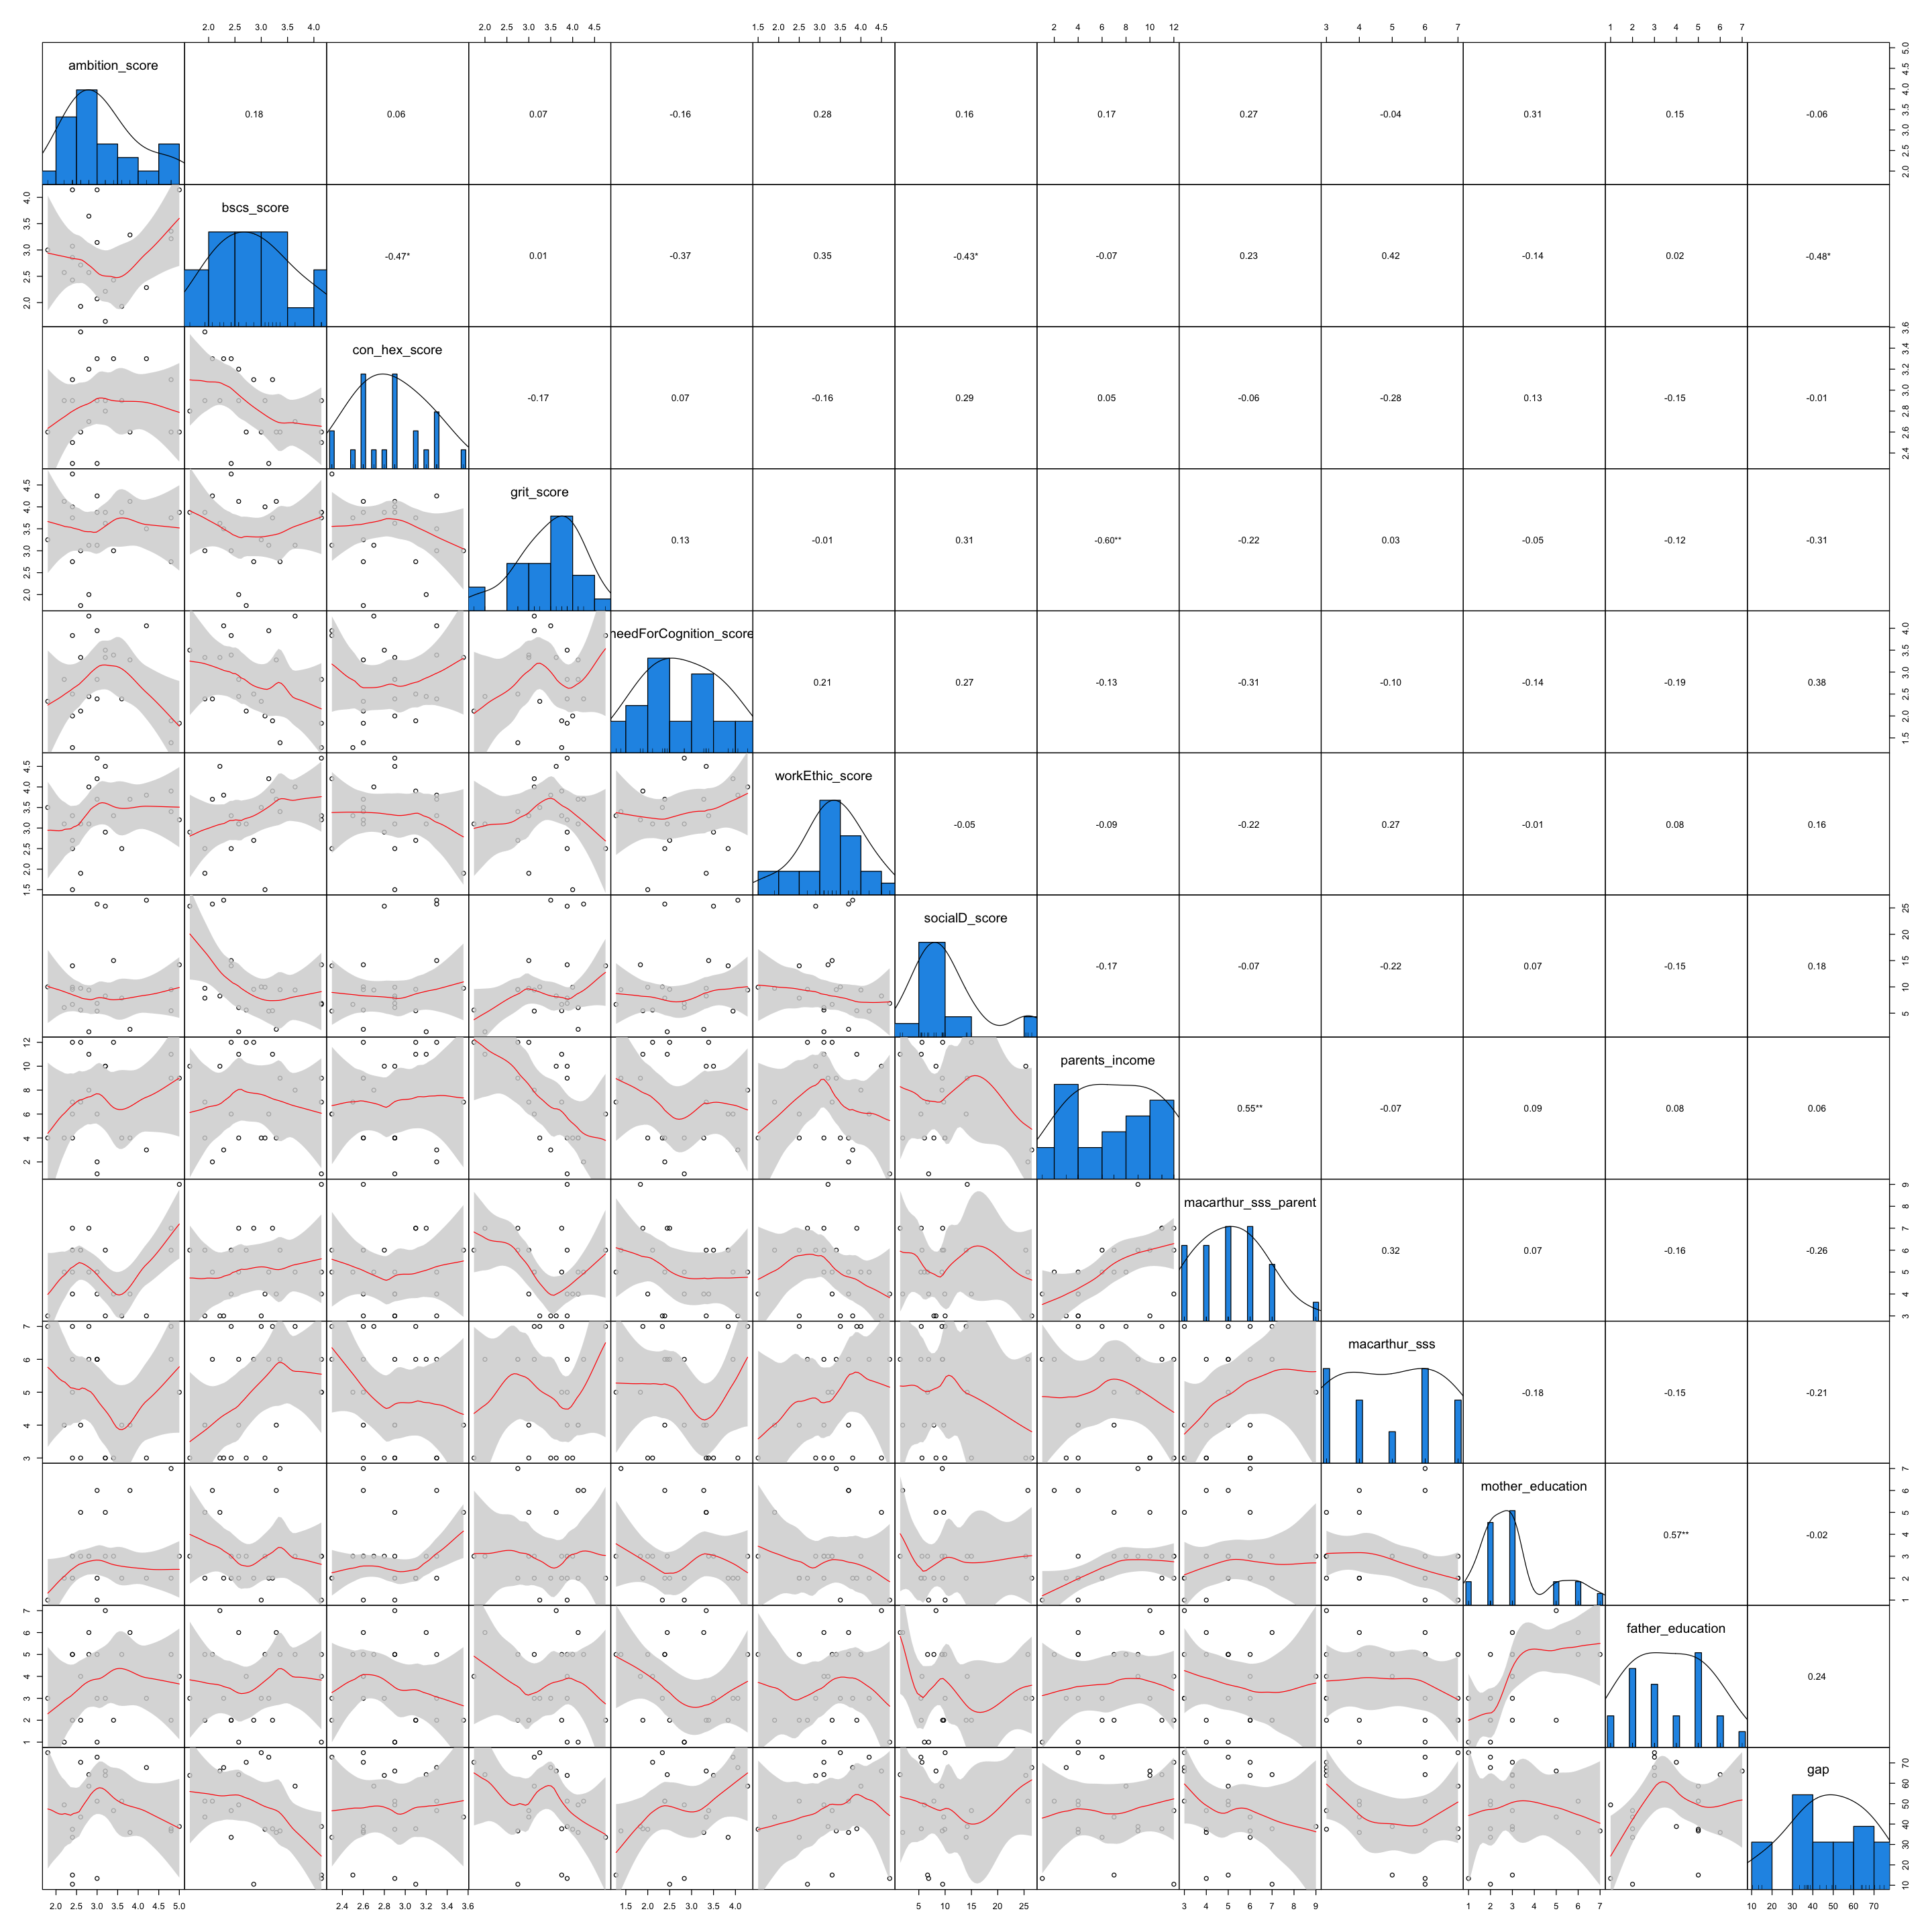

In [408]:
options(repr.plot.width = 24, repr.plot.height = 24)

pairs.panels(clean_pro[, c(predictors, 'gap')],
             smooth = TRUE,      # If TRUE, draws loess smooths
             scale = FALSE,      # If TRUE, scales the correlation text font
             density = TRUE,     # If TRUE, adds density plots and histograms
             ellipses = FALSE,    # If TRUE, draws ellipses
             method = "pearson", # Correlation method (also "spearman" or "kendall")
             pch = 21,           # pch symbol
             lm = FALSE,         # If TRUE, plots linear fit rather than the LOESS (smoothed) fit
             cor = TRUE,         # If TRUE, reports correlations
             jiggle = FALSE,     # If TRUE, data points are jittered
             factor = 2,         # Jittering factor
             hist.col = 4,       # Histograms color
             stars = TRUE,       # If TRUE, adds significance level with stars
             ci = TRUE,
             cex.labels=1.5,
            gap=0)          # If TRUE, adds confidence intervals

#### Predicted BY Gap

In [412]:
outcomes = c('dass_depress',
             'dass_anxiety',
             'dass_stress',
             'flourish_score',
             'fat',
             'fruit_veg',
             'future_score',
             'harmony_score',
             'qualityLife_score',
             'swl_cantril_ladder',
             'SWL5_score',
             'self_esteem_single_1',
             'subjectHappy_score',
             'gpa_undergrad',
             'gpa_highschool',
             'bmi')

In [415]:
# make all numeric
clean_sona123[, c(outcomes)] = lapply(clean_sona123[, c(outcomes)], as.numeric) %>% as_tibble()

In [416]:
gap_out_sona123 = as.data.frame(cor(clean_sona123[, c(outcomes)], clean_sona123[, 'gap'], use="pairwise.complete.obs"))

In [419]:
gap_out_sona123

V1          
dass_depress          0.184223996
dass_anxiety          0.111877018
dass_stress           0.157846108
flourish_score       -0.462216454
fat                  -0.064595510
fruit_veg            -0.175715962
future_score         -0.323801650
harmony_score        -0.354732708
qualityLife_score    -0.534830368
swl_cantril_ladder   -0.230912947
SWL5_score           -0.310906146
self_esteem_single_1 -0.325465221
subjectHappy_score   -0.271987701
gpa_undergrad        -0.137670721
gpa_highschool        0.042682638
bmi                  -0.009766816

In [462]:
gap_outs_sona123 = as.data.frame(cor(clean_sona123[, c(outcomes)], clean_sona123[, 'gap'], use="pairwise.complete.obs"))

In [463]:
gap_outs_sona123$r = round(gap_outs_sona123$V1, 2)
gap_outs_sona123$Significance = c('*','','','***', '', '*', '***', '***', '***', '***', '***', '***', '**', '', '', '')
gap_outs_sona123$Significance = as.factor(gap_outs_sona123$Significance)
gap_outs_sona123 = rownames_to_column(gap_outs_sona123, "Measure")
gap_outs_sona123$Measure = c('Depression', 'Anxiety', 'Stress', 'Flourishing', 'Fat Con.', 'Fruit/Veg Con.', 'Future Perspective', 'Harmony', 'Life Quality', 'Cantril', 'SWL', 'Self Esteem', 'Sub. Happiness', 'GPA Undergrad', 'GPA HighSchool', 'BMI')

In [467]:
gap_outs_pro = as.data.frame(cor(clean_pro[, c(outcomes)], clean_pro[, 'gap'], use="pairwise.complete.obs"))

In [468]:
gap_outs_pro$r = round(gap_outs_pro$V1, 2)
gap_outs_pro$Significance = c('**','', '', '**', '', '', '', '*', '*', '', '', '*', '**', '', '', '')
gap_outs_pro$Significance = as.factor(gap_outs_pro$Significance)
gap_outs_pro = rownames_to_column(gap_outs_pro, "Measure")
gap_outs_pro$Measure = c('Depression', 'Anxiety', 'Stress', 'Flourishing', 'Fat Con.', 'Fruit/Veg Con.', 'Future Perspective', 'Harmony', 'Life Quality', 'Cantril', 'SWL', 'Self Esteem', 'Sub. Happiness', 'GPA Undergrad', 'GPA HighSchool', 'BMI')

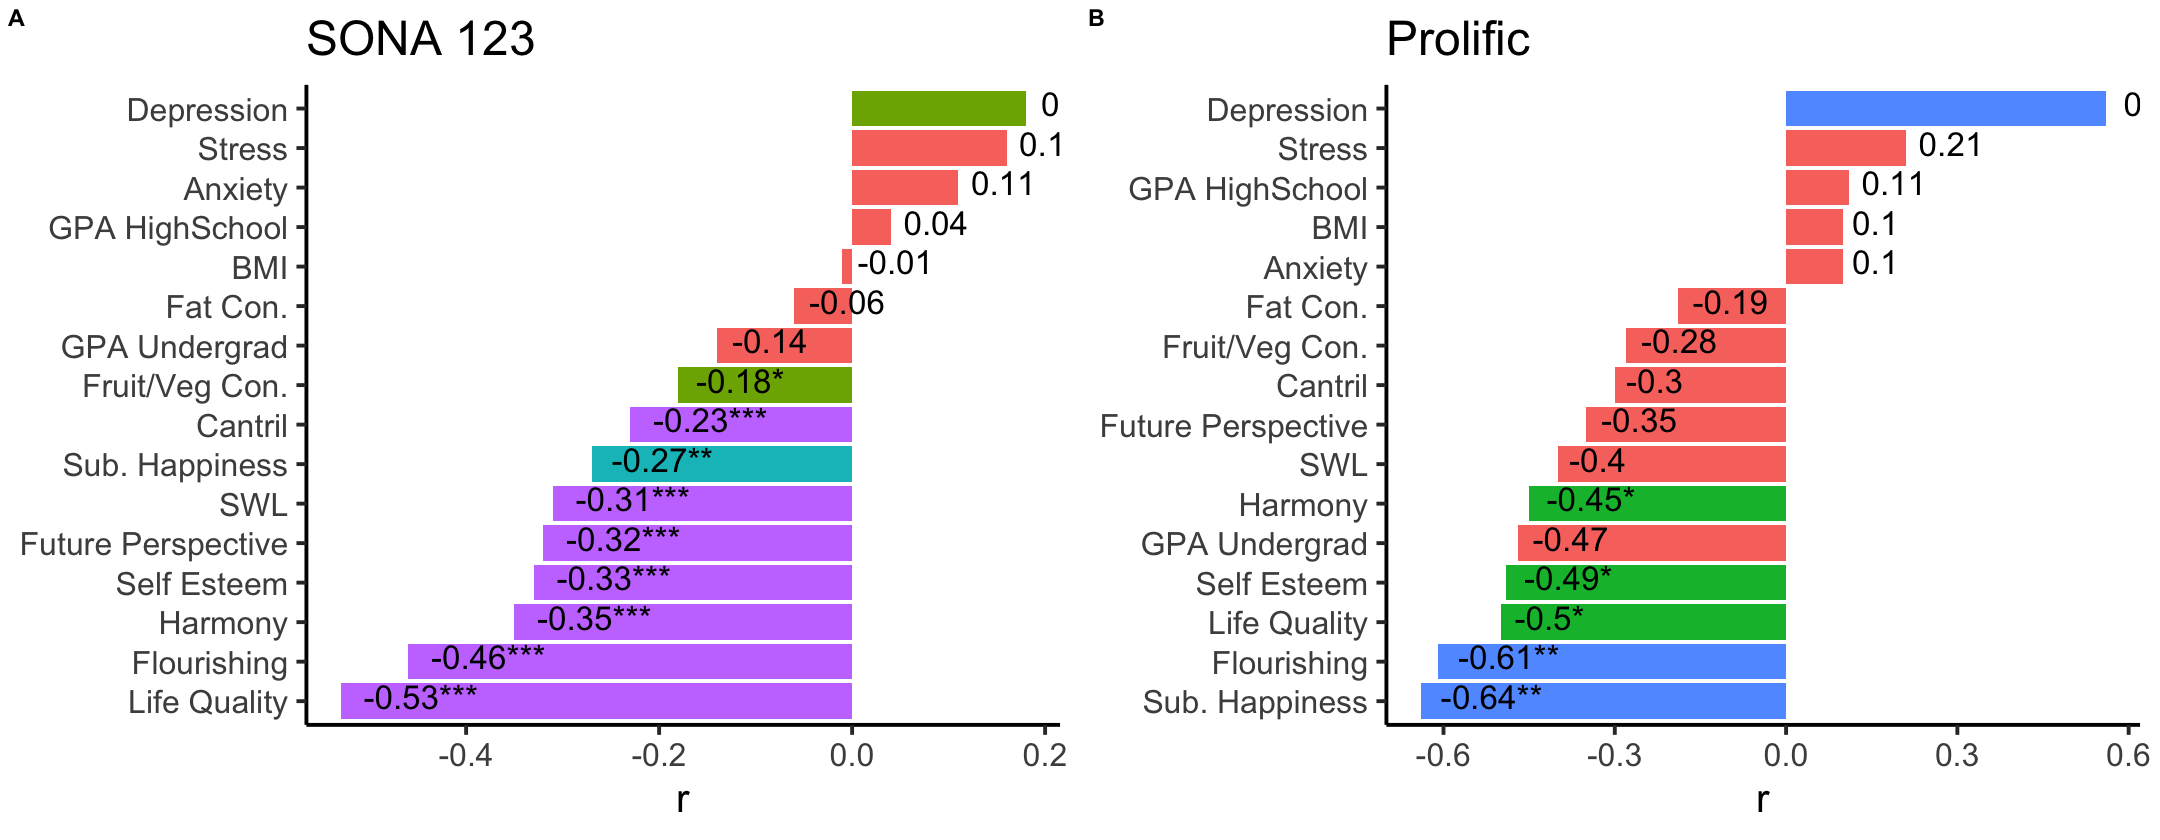

In [469]:
options(repr.plot.width = 18, repr.plot.height = 7)

a = ggplot(gap_outs_sona123, aes(x= reorder(Measure, r), y=r, fill = Significance)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=paste0(r, Significance)), vjust=.3, hjust = -0.2, size=7, color = 'black') +
    labs(title = "SONA 123") +
    coord_flip() +
    theme_classic(base_size = 24) +
    theme(legend.position = "none",
          axis.title.y = element_blank())

b = ggplot(gap_outs_pro, aes(x= reorder(Measure, r), y=r, fill = Significance)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=paste0(r, Significance)), vjust=.3, hjust = -0.2, size=7, color = 'black') +
    labs(title = "Prolific") +
    coord_flip() +
    theme_classic(base_size = 24) +
    theme(legend.position = "none",
          axis.title.y = element_blank())

plot_grid(a, b, labels = "AUTO")

In [460]:
cor.test(clean_pro$gap, clean_pro$bmi)


	Pearson's product-moment correlation

data:  clean_pro$gap and clean_pro$bmi
t = 0.45454, df = 20, p-value = 0.6543
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3347628  0.5013521
sample estimates:
      cor 
0.1011172 


### Cronbach's Alpha

In [477]:
duplicated_names <- duplicated(colnames(clean_pro))
clean_pro = clean_pro[!duplicated_names]

In [497]:
success_clean_pro = clean_pro %>%
    as_tibble() %>%
    select(contains('ib_domain_success')) %>%
    sapply(as.numeric) %>%
    as_tibble()

In [498]:
gap_clean_sona123 = clean_sona123 %>%
    as_tibble() %>%
    select(contains('domain_gap_')) %>%
    sapply(as.numeric) %>%
    as_tibble()

In [523]:
alpha = alpha(gap_clean_sona123)

Number of categories should be increased  in order to count frequencies. 

Warning message in cor.smooth(r):
“Matrix was not positive definite, smoothing was done”
Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”
Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”
Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”
Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”
Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”
Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”
Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”
Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”
Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”
Warning message in cor.smooth(R):
“

In [528]:
alpha


Reliability analysis   
Call: alpha(x = gap_clean_sona123)

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean sd median_r
      0.94      0.94    0.98      0.34  16 0.005  3.1  1     0.33

    95% confidence boundaries 
         lower alpha upper
Feldt     0.93  0.94  0.95
Duhachek  0.93  0.94  0.95

 Reliability if an item is dropped:
                                    raw_alpha std.alpha G6(smc) average_r S/N
ib_domain_gap_Diet                       0.94      0.94    0.98      0.34  16
ib_domain_gap_Exercise                   0.94      0.94    0.98      0.34  16
ib_domain_gap_MentalPersonal_Health      0.94      0.94    0.98      0.34  16
ib_domain_gap_Medical_Health             0.94      0.94    0.98      0.34  16
ib_domain_gap_Sleep                      0.94      0.94    0.97      0.34  16
ib_domain_gap_Alcohol_drug               0.94      0.94    0.97      0.35  17
ib_domain_gap_Online                     0.94      0.94    0.97      0.33  16
ib_domain_gap_Phone             

### Inter item and item total correlations

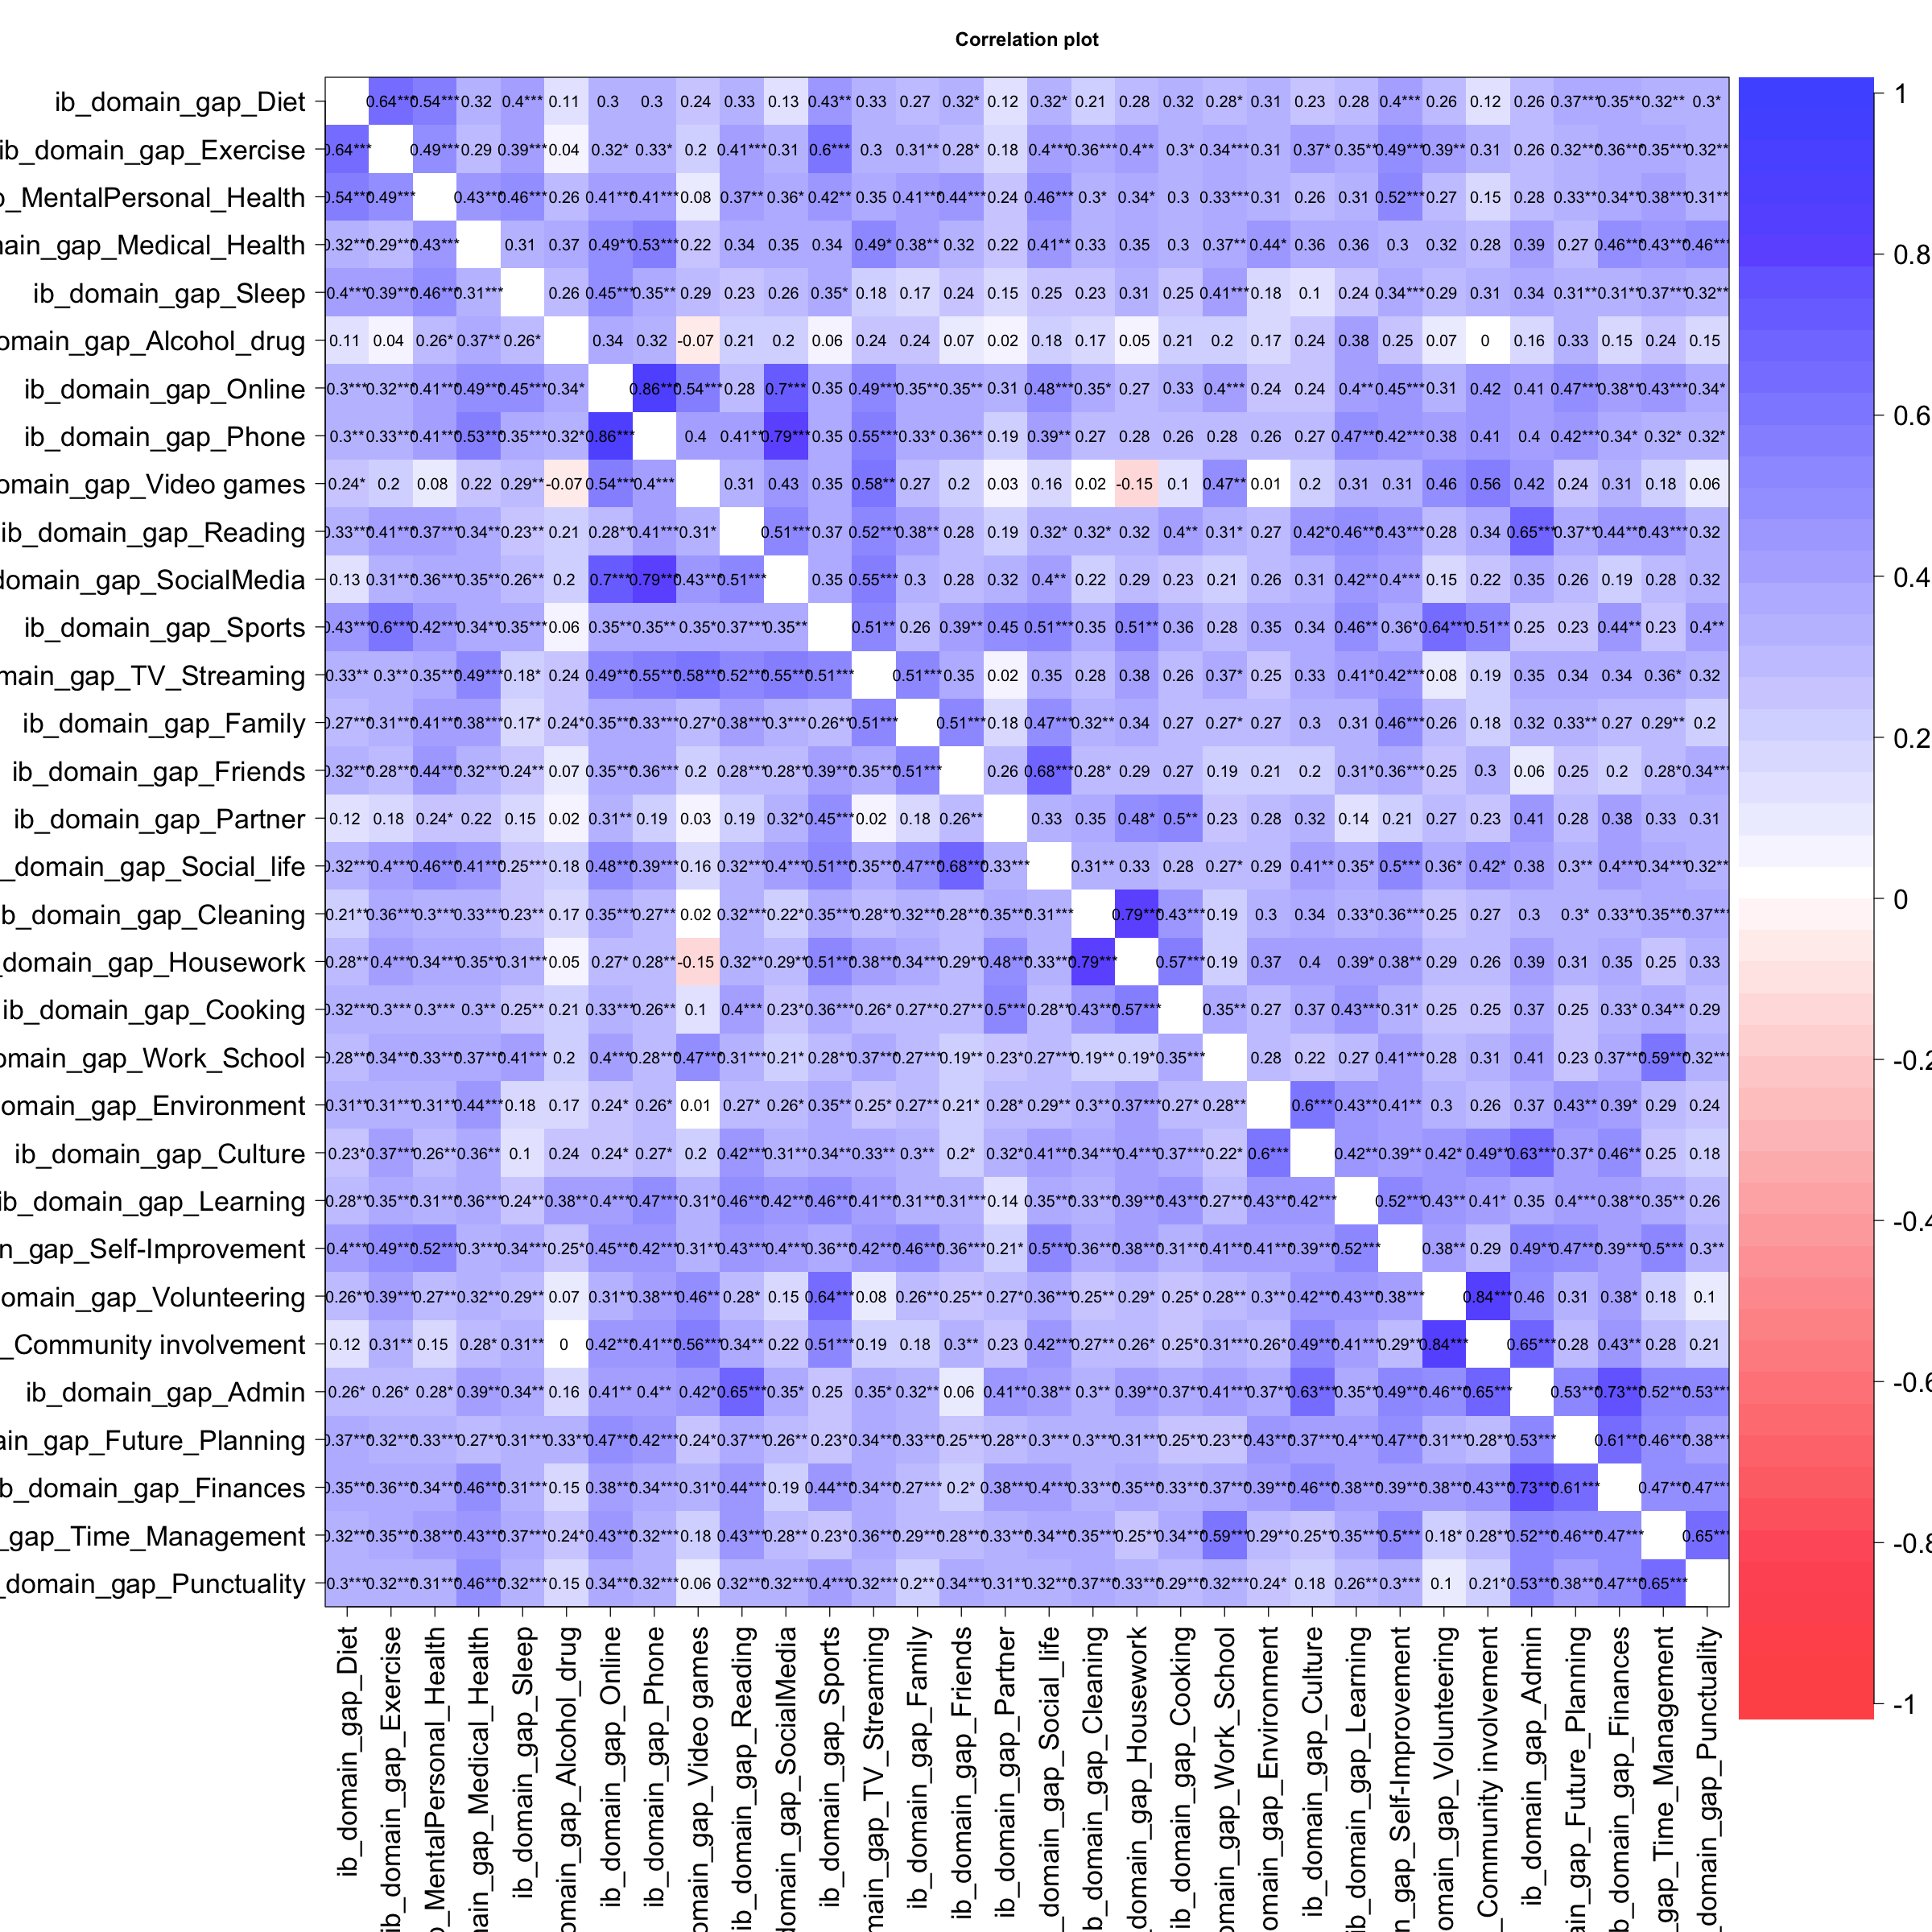

In [530]:
# set plot size
options(repr.plot.width = 20, repr.plot.height = 20)

cor.plot(gap_clean_sona123, cex = 1, xlas = 2, stars = TRUE, diag = FALSE, cex.axis = 1.7, MAR=11)

#### Inter Item

>Inter-item correlations are an essential element in conducting an item analysis of a set of test questions. Inter-item correlations examine the extent to which scores on one item are related to scores on all other items in a scale. It provides an assessment of item redundancy: the extent to which items on a scale are assessing the same content (Cohen & Swerdlik, 2005). Ideally, the average inter-item correlation for a set of items should be between .20 and .40, suggesting that while the items are reasonably homogenous, they do contain sufficiently unique variance so as to not be isomorphic with each other.

- Piedmont, 2014

In [570]:
x = as.data.frame(cor(gap_clean_sona123, use="pairwise.complete.obs"))
x$correction = -1 # cancel out the perfect correlation with itself

inter_item = arrange(as.data.frame(rowMeans(x)), `rowMeans(x)`)
inter_item = rename(inter_item, inter_item_cor = `rowMeans(x)`)
inter_item

inter_item_cor
ib_domain_gap_Alcohol_drug          0.1697573     
ib_domain_gap_Video games           0.2339006     
ib_domain_gap_Partner               0.2403243     
ib_domain_gap_Sleep                 0.2748307     
ib_domain_gap_Friends               0.2751633     
ib_domain_gap_Environment           0.2836076     
ib_domain_gap_Diet                  0.2843701     
ib_domain_gap_Cleaning              0.2894872     
ib_domain_gap_Work_School           0.2917048     
ib_domain_gap_Family                0.2933215     
ib_domain_gap_Punctuality           0.2948272     
ib_domain_gap_Cooking               0.2956859     
ib_domain_gap_Volunteering          0.2998370     
ib_domain_gap_Community involvement 0.3085940     
ib_domain_gap_Housework             0.3125723     
ib_domain_gap_SocialMedia           0.3132068     
ib_domain_gap_Culture               0.3167771     
ib_domain_gap_Exercise              0.3247847     
ib_domain_gap_Future_Planning       0.3260455     
ib_domain_gap_MentalPersonal_Health 0.3287891     
ib_domain_gap_TV_Streaming          0.3338325     
ib_domain_gap_Time_Management       0.3340844     
ib_domain_gap_Reading               0.3399506     
ib_domain_gap_Medical_Health        0.3404240     
ib_domain_gap_Learning              0.3431469     
ib_domain_gap_Social_life           0.3440016     
ib_domain_gap_Finances              0.3550838     
ib_domain_gap_Sports                0.3580509     
ib_domain_gap_Phone                 0.3631447     
ib_domain_gap_Self-Improvement      0.3690344     
ib_domain_gap_Admin                 0.3756120     
ib_domain_gap_Online                0.3775493

#### Item Total

>The item total correlation is a measure of the reliability of a multi-item scale and a tool for improving such scales. It is the correlation between an individual item and the total score without that item. For example, if you had a test that had 20 items, there would be 20-item total correlations. For item 1, it would be the correlation between item 1 and the sum of the other 19 items.

In [587]:
cor(gap_clean_sona123[i], rowMeans(gap_clean_sona123[i_minus], na.rm=TRUE), use="pairwise.complete.obs")[1]

[1] 0.5055735

In [591]:
for (i in 1:dim(gap_clean_sona123)[2]){
    i_minus = -1*i
    x = cor(gap_clean_sona123[i], rowMeans(gap_clean_sona123[i_minus], na.rm=TRUE), use="pairwise.complete.obs")
    print(x)
}
    

                        [,1]
ib_domain_gap_Diet 0.5516239
                            [,1]
ib_domain_gap_Exercise 0.5780142
                                         [,1]
ib_domain_gap_MentalPersonal_Health 0.5990739
                                  [,1]
ib_domain_gap_Medical_Health 0.5625891
                         [,1]
ib_domain_gap_Sleep 0.5069502
                                [,1]
ib_domain_gap_Alcohol_drug 0.3246523
                          [,1]
ib_domain_gap_Online 0.6382477
                        [,1]
ib_domain_gap_Phone 0.606392
                              [,1]
ib_domain_gap_Video games 0.419051
                           [,1]
ib_domain_gap_Reading 0.5620528
                               [,1]
ib_domain_gap_SocialMedia 0.5189414
                          [,1]
ib_domain_gap_Sports 0.6032289
                                [,1]
ib_domain_gap_TV_Streaming 0.5520697
                          [,1]
ib_domain_gap_Family 0.4882446
                           [,1]
ib_domain_gap_Fr

In [595]:
rownames(cor(gap_clean_sona123[i], rowMeans(gap_clean_sona123[i_minus], na.rm=TRUE), use="pairwise.complete.obs"))

[1] "ib_domain_gap_Punctuality"

### Intraclass Correlation Coefficient

In [ ]:
var_items
var_scores

### Predictions across domains

- Compare to average gap across subjects
- Compare to average gap in that domain across subjects


### Test Retest

## Extensions

### Fitted Gap

Shouldn’t time, effort, and importance play a role?

How well does unfitted vs. fitted correlate with first pc of pca of outcome measures

### Independent Contribution to Outcome

If we include the measure with all other predictors how often is it in the best model?

### Factor Analysis

- KMO
- Bartlett
- Give a shot..

### Domain Interactions